In [21]:
import os, shutil


In [2]:
train_dir = 'C:/Users/FAYYAZ/Desktop/famly/data/train'


In [3]:
validation_dir = 'C:/Users/FAYYAZ/Desktop/famly/data/val'

In [56]:
#test_dir = 'C:/Users/FAYYAZ/Desktop/celeb/test'

In [5]:
import tensorflow as tf


In [9]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [10]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [11]:
from tensorflow.keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [22]:
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=5,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 93 images belonging to 5 classes.


In [23]:
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=5,
        class_mode='categorical')

Found 25 images belonging to 5 classes.


In [24]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (5, 150, 150, 3)
labels batch shape: (5, 5)


In [20]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=20,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=5)
     

Epoch 1/30
20/20 [==============================] - 14s 704ms/step - loss: 1.6223 - acc: 0.1735 - val_loss: 1.5865 - val_acc: 0.2800
Epoch 2/30
20/20 [==============================] - 9s 449ms/step - loss: 1.5300 - acc: 0.3229 - val_loss: 1.5816 - val_acc: 0.2400
Epoch 3/30
20/20 [==============================] - 9s 448ms/step - loss: 1.4813 - acc: 0.5000 - val_loss: 1.4826 - val_acc: 0.3600
Epoch 4/30
20/20 [==============================] - 9s 427ms/step - loss: 1.2544 - acc: 0.6200 - val_loss: 1.5103 - val_acc: 0.3600
Epoch 5/30
20/20 [==============================] - 9s 441ms/step - loss: 1.0824 - acc: 0.6837 - val_loss: 1.3837 - val_acc: 0.4000
Epoch 6/30
20/20 [==============================] - 9s 447ms/step - loss: 0.9538 - acc: 0.6224 - val_loss: 1.5032 - val_acc: 0.3600
Epoch 7/30
20/20 [==============================] - 9s 448ms/step - loss: 0.7986 - acc: 0.7245 - val_loss: 1.2907 - val_acc: 0.5600
Epoch 8/30
20/20 [==============================] - 8s 416ms/step - loss: 0

In [25]:
model.save('celeb.h5')

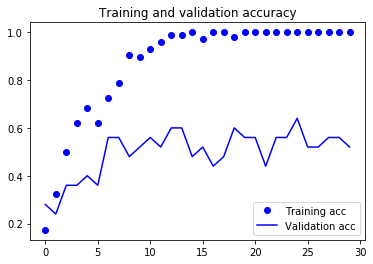

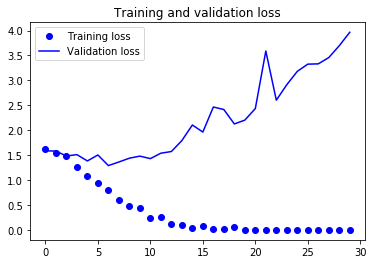

In [27]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()